In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

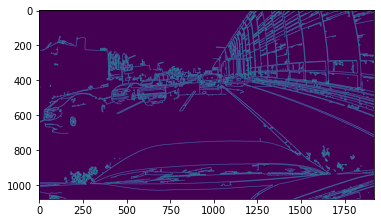

In [34]:
img = mpimg.imread("./day_img/day_example4.jpg")

gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blur_img = cv2.GaussianBlur(gray_img, (1, 3), 0)
canny_img = cv2.Canny(blur_img, 10, 100)

plt.imshow(canny_img)